In [9]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

import util as utl

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [11]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
# X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_scores(model, X, y, w='macro'):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print('Accuracy: ', acc)
    print('Precision: ', precision_score(y, y_pred, average=w))
    print('Recall: ', recall_score(y, y_pred, average=w))
    print('F1: ', f1_score(y, y_pred, average=w))

# KNN model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

# knn_clf.fit(X_train_scaled, y_train)

# SGD model

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

# Random Forest model

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

# Hyper Tune

## KNN

In [16]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_neighbors': [2, 3, 4, 5, 6],
    'weights': ['distance', 'uniform']
}

knn_random_search = RandomizedSearchCV(knn_clf, param_distributions=param, cv=3, n_iter=10, verbose=2, scoring='accuracy', return_train_score=True)

set_size = 20000

knn_random_search.fit(X_train[:set_size], y_train[:set_size])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....................n_neighbors=2, weights=distance; total time=   1.8s
[CV] END ....................n_neighbors=2, weights=distance; total time=   2.4s
[CV] END ....................n_neighbors=2, weights=distance; total time=   2.3s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   2.3s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   3.2s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   1.6s
[CV] END ....................n_neighbors=3, weights=distance; total time=   1.6s
[CV] END ....................n_neighbors=3, weights=distance; total time=   2.2s
[CV] END ....................n_neighbors=3, weights=distance; total time=   1.8s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   2.3s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   2.5s
[CV] END .....................n_neighbors=3, wei

,estimator,KNeighborsClassifier()
,param_distributions,"{'n_neighbors': [2, 3, ...], 'weights': ['distance', 'uniform']}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [17]:
knn_random_search.best_params_

{'weights': 'distance', 'n_neighbors': 3}

In [18]:
knn_random_search.best_estimator_.fit(X_train, y_train)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
knn_clf = knn_random_search.best_estimator_

## SGD

In [22]:
params = {
    'loss': ['hinge'],
    'alpha': [0.0001, 0.001, 0.3, 0.03],
    'penalty': ['l2', 'l1'],
    'early_stopping': [True],
    'max_iter': [5000]
}

sgd_random_search = RandomizedSearchCV(sgd_clf, param_distributions=params, cv=3, n_iter=10, verbose=2, scoring='accuracy', return_train_score=True)

sgd_random_search.fit(X_train[:set_size], y_train[:set_size])

/home/vinh/hv/iai600/assignments/5/repo/dev/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END alpha=0.0001, early_stopping=True, loss=hinge, max_iter=5000, penalty=l2; total time=   1.1s
[CV] END alpha=0.0001, early_stopping=True, loss=hinge, max_iter=5000, penalty=l2; total time=   1.0s
[CV] END alpha=0.0001, early_stopping=True, loss=hinge, max_iter=5000, penalty=l2; total time=   1.3s
[CV] END alpha=0.0001, early_stopping=True, loss=hinge, max_iter=5000, penalty=l1; total time=   2.2s
[CV] END alpha=0.0001, early_stopping=True, loss=hinge, max_iter=5000, penalty=l1; total time=   2.3s
[CV] END alpha=0.0001, early_stopping=True, loss=hinge, max_iter=5000, penalty=l1; total time=   2.4s
[CV] END alpha=0.001, early_stopping=True, loss=hinge, max_iter=5000, penalty=l2; total time=   1.0s
[CV] END alpha=0.001, early_stopping=True, loss=hinge, max_iter=5000, penalty=l2; total time=   1.4s
[CV] END alpha=0.001, early_stopping=True, loss=hinge, max_iter=5000, penalty=l2; total time=   1.8s
[CV] END alpha=0.001, ear

,estimator,SGDClassifier(random_state=42)
,param_distributions,"{'alpha': [0.0001, 0.001, ...], 'early_stopping': [True], 'loss': ['hinge'], 'max_iter': [5000], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [23]:
sgd_random_search.best_params_

{'penalty': 'l1',
 'max_iter': 5000,
 'loss': 'hinge',
 'early_stopping': True,
 'alpha': 0.0001}

In [24]:
sgd_random_search.best_estimator_.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l1'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,5000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [25]:
sgd_clf = sgd_random_search.best_estimator_

## Random Forest

In [26]:
params = {
    'n_estimators': [300, 500, 1000],
    'max_features': [20, 50, 100],
    'min_samples_split': [3, 7, 13, 20],
    'max_depth': [3, 5, 10]
}

forest_random_search = RandomizedSearchCV(rf_clf, param_distributions=params, cv=3, n_iter=10, verbose=2, scoring='accuracy', return_train_score=True)

forest_random_search.fit(X_train[:set_size], y_train[:set_size])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=20, min_samples_split=7, n_estimators=1000; total time=  29.2s
[CV] END max_depth=10, max_features=20, min_samples_split=7, n_estimators=1000; total time=  26.8s
[CV] END max_depth=10, max_features=20, min_samples_split=7, n_estimators=1000; total time=  27.2s
[CV] END max_depth=3, max_features=20, min_samples_split=20, n_estimators=500; total time=   4.7s
[CV] END max_depth=3, max_features=20, min_samples_split=20, n_estimators=500; total time=   4.7s
[CV] END max_depth=3, max_features=20, min_samples_split=20, n_estimators=500; total time=   4.7s
[CV] END max_depth=3, max_features=20, min_samples_split=7, n_estimators=500; total time=   4.7s
[CV] END max_depth=3, max_features=20, min_samples_split=7, n_estimators=500; total time=   4.6s
[CV] END max_depth=3, max_features=20, min_samples_split=7, n_estimators=500; total time=   4.7s
[CV] END max_depth=10, max_features=20, min_samples_split

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [3, 5, ...], 'max_features': [20, 50, ...], 'min_samples_split': [3, 7, ...], 'n_estimators': [300, 500, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [27]:
forest_random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 7,
 'max_features': 20,
 'max_depth': 10}

In [28]:
forest_random_search.best_estimator_.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,10
,min_samples_split,7
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,20
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
rf_clf = forest_random_search.best_estimator_

# Evaluate

## KNN

In [30]:
print_scores(knn_clf, X_train, y_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


In [31]:
print_scores(knn_clf, X_test, y_test)

Accuracy:  0.9717
Precision:  0.9719031233123564
Recall:  0.9713357268999042
F1:  0.971528765919764


In [52]:
from sklearn.model_selection import learning_curve, ShuffleSplit

common_params = {
    "X": X_train[:8000],
    "y": y_train[:8000],
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}

train_sizes, _, test_scores_nb, fit_times_nb, score_times_nb = learning_curve(
    knn_clf, **common_params
)

Saving figure scalability_knn


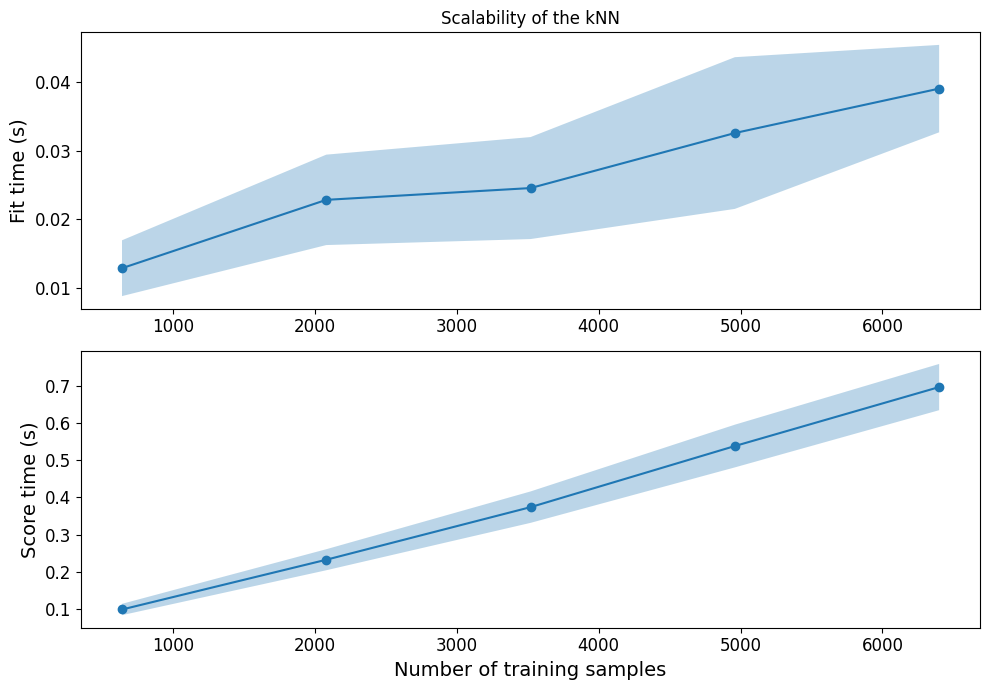

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
ax[0].plot(train_sizes, fit_times_nb.mean(axis=1), "o-")
ax[0].fill_between(
    train_sizes,
    fit_times_nb.mean(axis=1) - fit_times_nb.std(axis=1),
    fit_times_nb.mean(axis=1) + fit_times_nb.std(axis=1),
    alpha=0.3
)
ax[0].set_ylabel("Fit time (s)")
ax[0].set_title(f"Scalability of the kNN")

ax[1].plot(train_sizes, score_times_nb.mean(axis=1), "o-")
ax[1].fill_between(
    train_sizes,
    score_times_nb.mean(axis=1) - score_times_nb.std(axis=1),
    score_times_nb.mean(axis=1) + score_times_nb.std(axis=1),
    alpha=0.3,
)
ax[1].set_ylabel("Score time (s)")
ax[1].set_xlabel("Number of training samples")

save_fig('scalability_knn')

In [34]:
from sklearn.model_selection import ShuffleSplit, LearningCurveDisplay

def draw_learning_curve(model, X, y, score_method, title):
    common_params = {
        "X": X,
        "y": y,
        "train_sizes": np.linspace(0.1, 1.0, 5),
        "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
        "score_type": "both",
        "scoring": score_method,
        "line_kw": {"marker": "o"},
        "std_display_style": 'fill_between',
    }
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.subplots_adjust(hspace=0.5)

    LearningCurveDisplay.from_estimator(model, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Train Score", "Test Score"])
    ax.set_title(title)
    ax.set_xlabel("Set size")
    ax.grid(True)

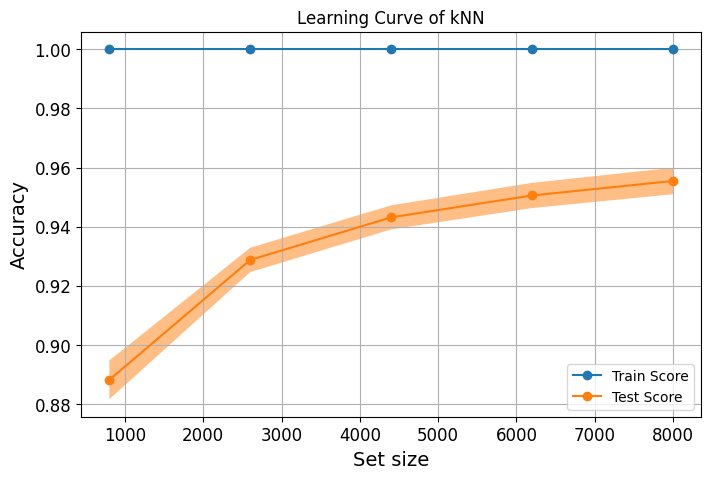

In [35]:
draw_learning_curve(knn_clf, X_test, y_test, "accuracy", 'Learning Curve of kNN')

## SGD

In [36]:
print_scores(sgd_clf, X_train, y_train)

Accuracy:  0.9029166666666667
Precision:  0.9043482089379454
Recall:  0.9011818598040644
F1:  0.9019624375266346


In [37]:
print_scores(sgd_clf, X_test, y_test)

Accuracy:  0.8949
Precision:  0.896955527690662
Recall:  0.8930273987418758
F1:  0.8937803756259266


In [50]:
from sklearn.model_selection import learning_curve, ShuffleSplit

common_params = {
    "X": X_train[:8000],
    "y": y_train[:8000],
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}

train_sizes, _, test_scores_nb, fit_times_nb, score_times_nb = learning_curve(
    sgd_clf, **common_params
)

Saving figure scalability_sgd


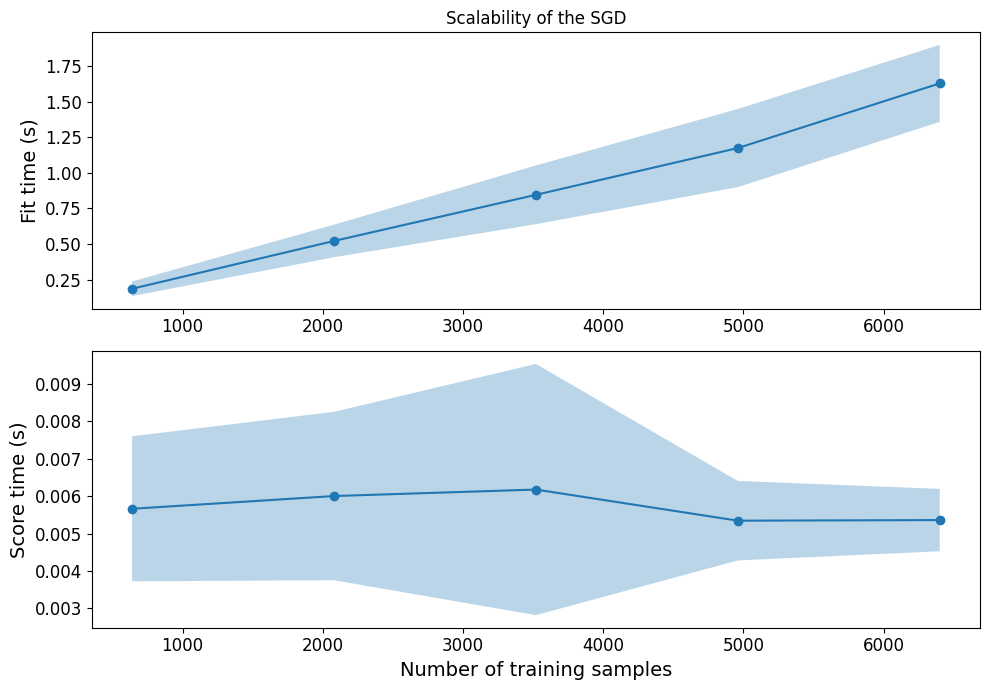

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
ax[0].plot(train_sizes, fit_times_nb.mean(axis=1), "o-")
ax[0].fill_between(
    train_sizes,
    fit_times_nb.mean(axis=1) - fit_times_nb.std(axis=1),
    fit_times_nb.mean(axis=1) + fit_times_nb.std(axis=1),
    alpha=0.3
)
ax[0].set_ylabel("Fit time (s)")
ax[0].set_title(f"Scalability of the SGD")

ax[1].plot(train_sizes, score_times_nb.mean(axis=1), "o-")
ax[1].fill_between(
    train_sizes,
    score_times_nb.mean(axis=1) - score_times_nb.std(axis=1),
    score_times_nb.mean(axis=1) + score_times_nb.std(axis=1),
    alpha=0.3,
)
ax[1].set_ylabel("Score time (s)")
ax[1].set_xlabel("Number of training samples")

save_fig('scalability_sgd')

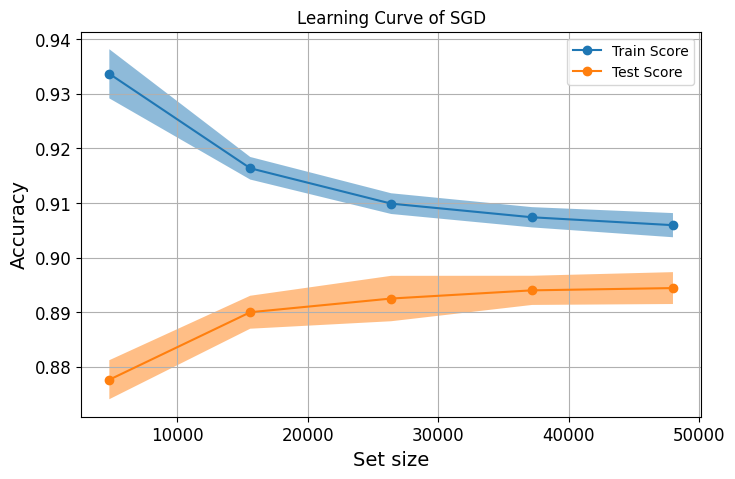

In [40]:
draw_learning_curve(sgd_clf, X_train, y_train, "accuracy", 'Learning Curve of SGD')

## Random Forest

In [41]:
print_scores(rf_clf, X_train, y_train)

Accuracy:  0.9634833333333334
Precision:  0.9637560962674862
Recall:  0.9632604384245456
F1:  0.9634544105305963


In [42]:
print_scores(rf_clf, X_test, y_test)

Accuracy:  0.9492
Precision:  0.9493140743103569
Recall:  0.9486784761769902
F1:  0.9488752845805472


In [47]:
from sklearn.model_selection import learning_curve, ShuffleSplit

common_params = {
    "X": X_train[:8000],
    "y": y_train[:8000],
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}

train_sizes, _, test_scores_nb, fit_times_nb, score_times_nb = learning_curve(
    rf_clf, **common_params
)

Saving figure scalability_rf


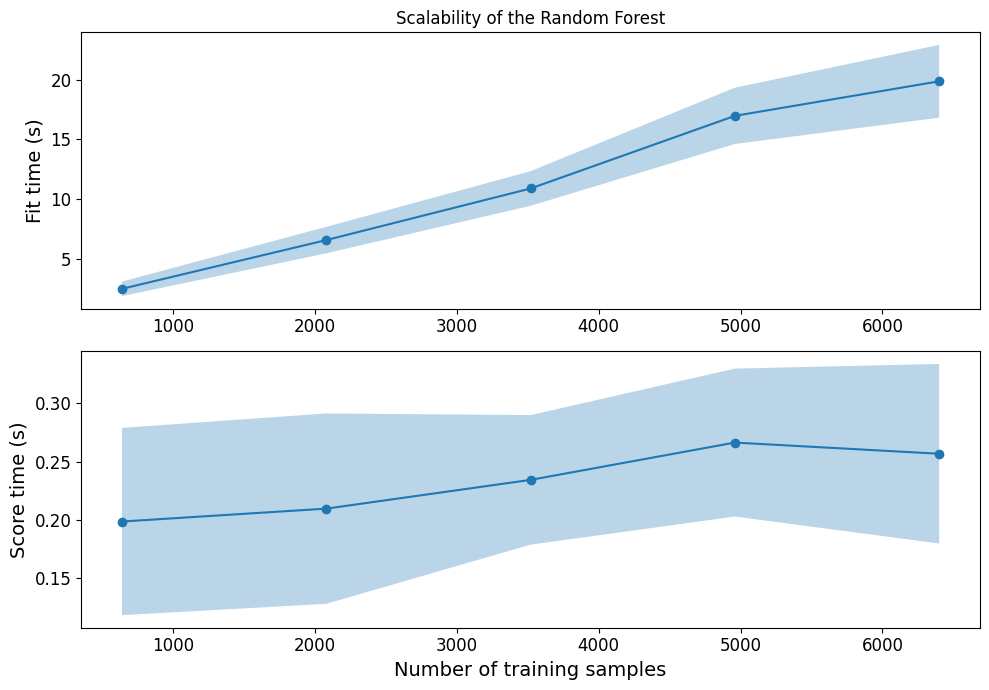

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
ax[0].plot(train_sizes, fit_times_nb.mean(axis=1), "o-")
ax[0].fill_between(
    train_sizes,
    fit_times_nb.mean(axis=1) - fit_times_nb.std(axis=1),
    fit_times_nb.mean(axis=1) + fit_times_nb.std(axis=1),
    alpha=0.3
)
ax[0].set_ylabel("Fit time (s)")
ax[0].set_title(f"Scalability of the Random Forest")

ax[1].plot(train_sizes, score_times_nb.mean(axis=1), "o-")
ax[1].fill_between(
    train_sizes,
    score_times_nb.mean(axis=1) - score_times_nb.std(axis=1),
    score_times_nb.mean(axis=1) + score_times_nb.std(axis=1),
    alpha=0.3,
)
ax[1].set_ylabel("Score time (s)")
ax[1].set_xlabel("Number of training samples")

save_fig('scalability_rf')

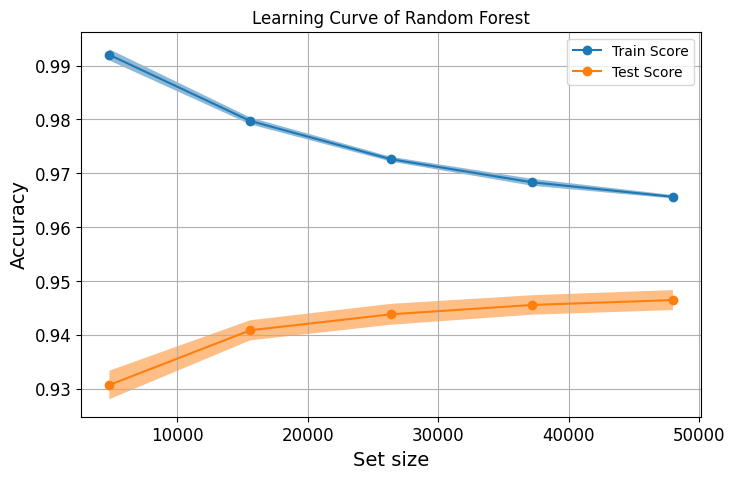

In [45]:
draw_learning_curve(rf_clf, X_train, y_train, "accuracy", 'Learning Curve of Random Forest')

In [46]:
utl.save_model(knn_clf, 'knn_clf')
utl.save_model(sgd_clf, 'sgd_clf')
utl.save_model(rf_clf, 'rf_clf')